## 🌐📡QoSify5G: Resource Allocation Prediction & QoS Optimization in 5G Networks


---

# Table of Contents

1. [📚 Introduction](#introduction)
2. [🧑‍💻 Methodology](#methodology)
   - [Data Preprocessing](#data-preparation)
   - [Feature Engineering](#feature-engineering)
   - [Data Analysis & Visualizatio](#data-analysis)
   - [Prediction Models](#prediction-models)
3. [🔍 Findings](#findings)
4. [📈 Actionable Insights](#actionable-insights)
5. [🏁 Conclusion](#conclusion)

---

### 📚 [Introduction](#introduction)
This project focuses on analyzing, predicting, and optimizing resource allocation in 5G networks to enhance Quality of Service (QoS) for diverse application types. The study combines data preprocessing, feature engineering, and statistical analysis to understand how variables like `Application_Type`, `Signal_Strength`, and `Latency` impact network performance. Advanced machine learning models, including SVR, Gradient Boosting, and Random Forest, are employed to predict `Resource_Allocation` accurately. Insights from this analysis aim to support dynamic resource allocation strategies, improve bandwidth utilization, and ensure consistent QoS across varied use cases in 5G networks.

---

### 🧑‍💻 [Methodology](#methodology)
- **Data Preparation**: Conducted preprocessing, feature scaling, and engineering. Standardized variables for modeling and handled infinite/NaN values.
- **Data Analysis**: Applied ANOVA to study the impact of Application_Type on Resource_Allocation. Visualized relationships between network metrics using line plots and boxplots.
- **Prediction Models**: Built and tuned 4 machine learning models—SVR, Tuned SVR, Gradient Boosting, and Random Forest—achieving a best RMSE of 2.93 and R² of 0.9023 with the Tuned Random Forest.

---

#### **Import Libraries**

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor




#### **Load Dataset**

In [3]:
df = pd.read_csv('Quality of Service 5G.csv')

#### **Dataset Summary**

In [4]:
print("First few rows of the dataset:")
print(df.head())

# Generate summary statistics
print("\nSummary:")
print(df.describe())

First few rows of the dataset:
        Timestamp User_ID   Application_Type Signal_Strength Latency  \
0  9/3/2023 10:00  User_1         Video_Call         -75 dBm   30 ms   
1  9/3/2023 10:00  User_2         Voice_Call         -80 dBm   20 ms   
2  9/3/2023 10:00  User_3          Streaming         -85 dBm   40 ms   
3  9/3/2023 10:00  User_4  Emergency_Service         -70 dBm   10 ms   
4  9/3/2023 10:00  User_5      Online_Gaming         -78 dBm   25 ms   

  Required_Bandwidth Allocated_Bandwidth Resource_Allocation  
0            10 Mbps             15 Mbps                 70%  
1           100 Kbps            120 Kbps                 80%  
2             5 Mbps              6 Mbps                 75%  
3             1 Mbps            1.5 Mbps                 90%  
4             2 Mbps              3 Mbps                 85%  

Summary:
             Timestamp User_ID Application_Type Signal_Strength Latency  \
count              400     400              400             400     400  

#### **Data info & Missing Data**

In [5]:
print("\nData Types and Missing Values:")
print(df.info())


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB
None


---

### **Data Preprocessing**

#### **Data Type Conversion**

In [6]:
# Convert Signal_Strength, Latency, Required_Bandwidth, Allocated_Bandwidth, and Resource_Allocation to numerical types
df['Signal_Strength'] = df['Signal_Strength'].str.extract(r'(-\d+)').astype(int)
df['Latency'] = df['Latency'].str.extract(r'(\d+)').astype(int)
df['Required_Bandwidth'] = df['Required_Bandwidth'].str.extract(r'(\d+)').astype(float)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].str.extract(r'(\d+)').astype(float)
df['Resource_Allocation'] = df['Resource_Allocation'].str.extract(r'(\d+)').astype(int)


#### **Normalization**

In [7]:
# Standardize Signal_Strength and Latency for 0 mean and 1 variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Signal_Strength', 'Latency']] = scaler.fit_transform(df[['Signal_Strength', 'Latency']])


### **Handling Missing Data**

In [8]:
# Handle infinite or NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

---

### **Feature Engineering**

In [9]:
# Feature Engineering
# Bandwidth Utilization Ratio
df['Bandwidth_Utilization_Ratio'] = df['Allocated_Bandwidth'] / df['Required_Bandwidth']
# Effective Bandwidth Usage
df['Effective_Bandwidth_Usage'] = (df['Required_Bandwidth'] / df['Allocated_Bandwidth']) * 100
# Latency-Bandwidth Tradeoff
df['Latency_Bandwidth_Tradeoff'] = (df['Latency'] / df['Bandwidth_Utilization_Ratio'])

---

#### **Data Segmentation**

In [10]:
# Segment the data based on Application_Type
segmented_data = df.groupby('Application_Type')

#### **ANOVA Test**

In [11]:
# Perform ANOVA test to assess the impact of Application_Type on Resource_Allocation
import scipy.stats as stats

f_value, p_value = stats.f_oneway(*[group['Resource_Allocation'].values for name, group in segmented_data])

print(f"F-value: {f_value}, P-value: {p_value}")

# Annotation: An ANOVA test is performed to assess if different 'Application_Type' significantly affect 'Resource_Allocation'.

F-value: 435.5218983437554, P-value: 2.4041349903988285e-204


---

### **Analysis & Visualization**
#### **Signal_Strength vs Application_Type**

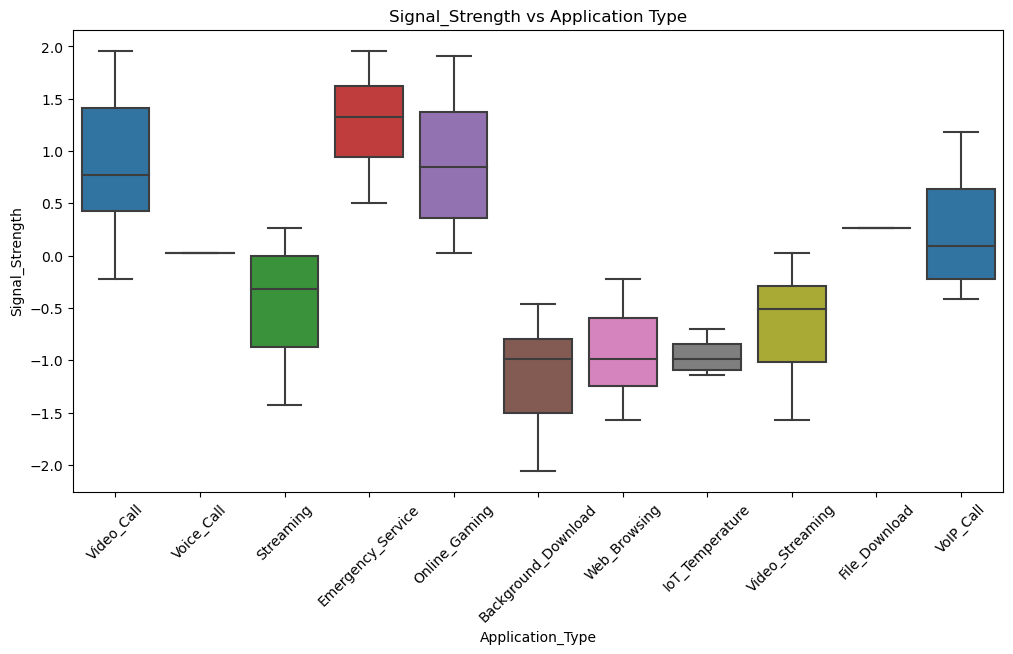

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Application_Type', y='Signal_Strength', hue='Application_Type', data=df, palette="tab10", dodge=False)
plt.title('Signal_Strength vs Application Type')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Disable the legend
plt.show()

#### **Latency vs Application_Type**

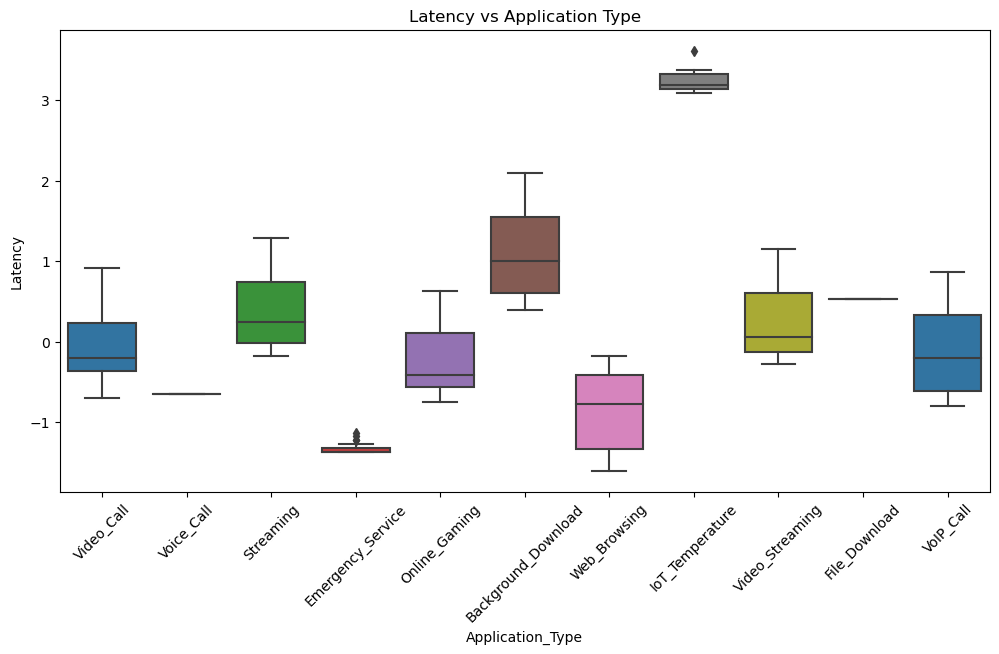

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Application_Type', y='Latency', hue='Application_Type', data=df, palette="tab10", dodge=False)
plt.title('Latency vs Application Type')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Disable the legend
plt.show()

#### **Resource_Allocation vs Application_Type**

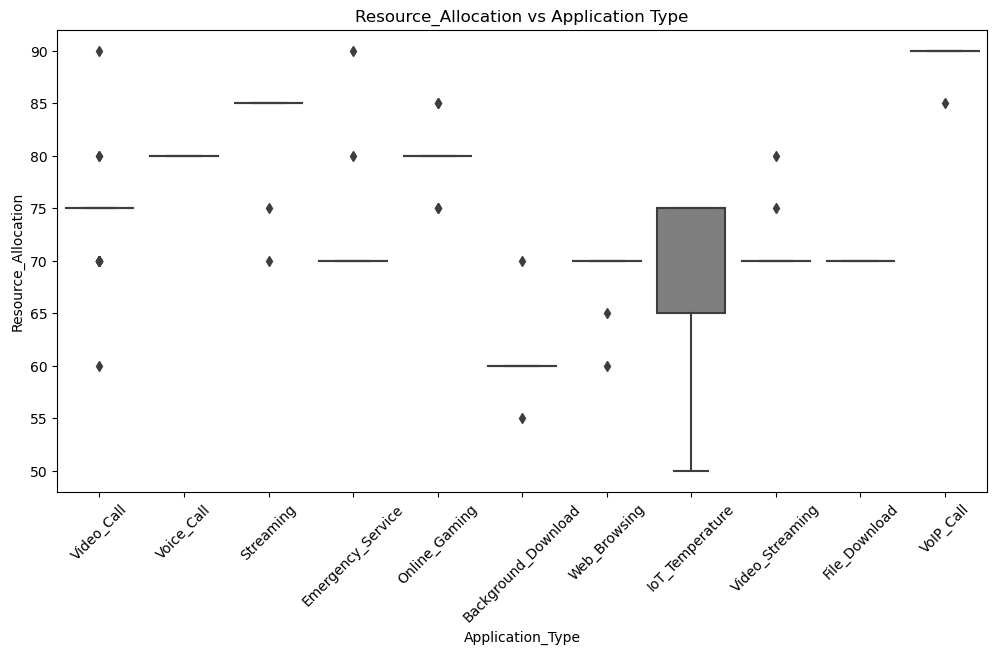

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Application_Type', y='Resource_Allocation', hue='Application_Type', data=df, palette="tab10", dodge=False)
plt.title('Resource_Allocation vs Application Type')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Disable the legend
plt.show()

### **Bandwidth Utilization by Application**

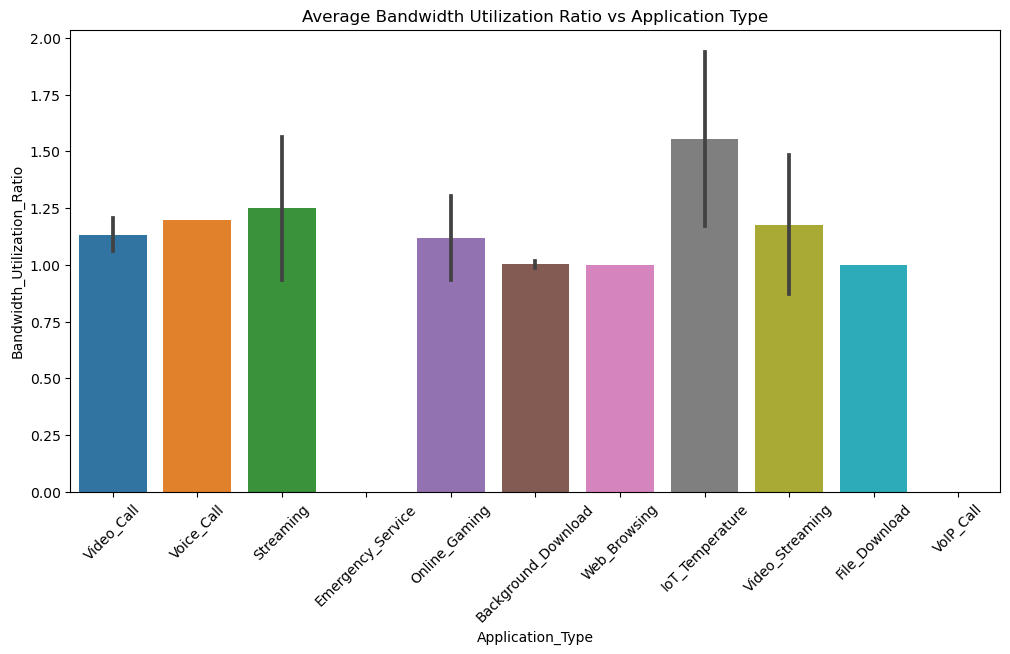

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Application_Type', y='Bandwidth_Utilization_Ratio', hue='Application_Type', 
            data=df, errorbar="sd", palette="tab10", width=0.8, dodge=False)  # Set dodge=False to avoid shifting
plt.title('Average Bandwidth Utilization Ratio vs Application Type')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Disable the legend
plt.show()

### **Distribution of Resource Allocation**


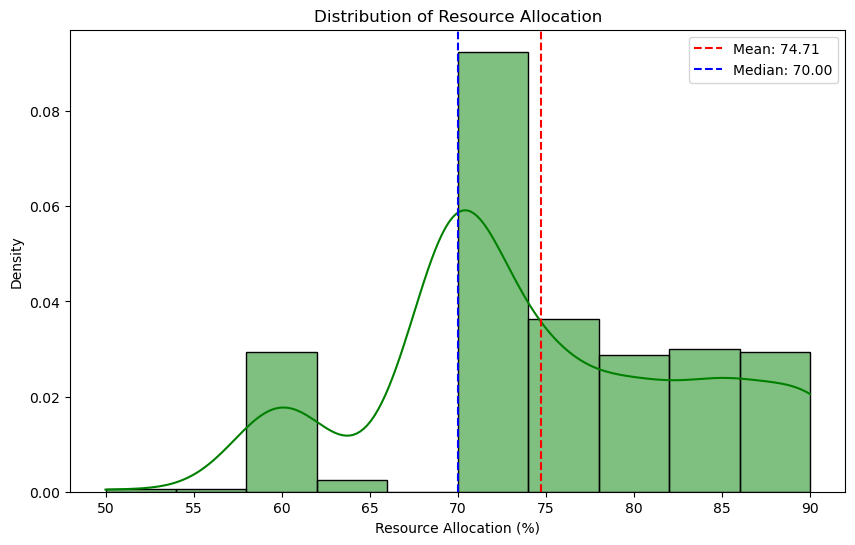

In [16]:
plt.figure(figsize=(10, 6))

# Plotting the histogram with KDE
sns.histplot(data=df, x='Resource_Allocation', bins=10, kde=True, color='green', stat='density')

# Adding vertical lines for the mean and median
mean_val = df['Resource_Allocation'].mean()
median_val = df['Resource_Allocation'].median()
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='blue', linestyle='--', label=f'Median: {median_val:.2f}')

# Adding a title and labels
plt.title('Distribution of Resource Allocation')
plt.xlabel('Resource Allocation (%)')
plt.ylabel('Density')

# Adding a legend to label the mean and median lines
plt.legend()

# Display the plot
plt.show()


### **Frequency of Application Types in the Dataset**


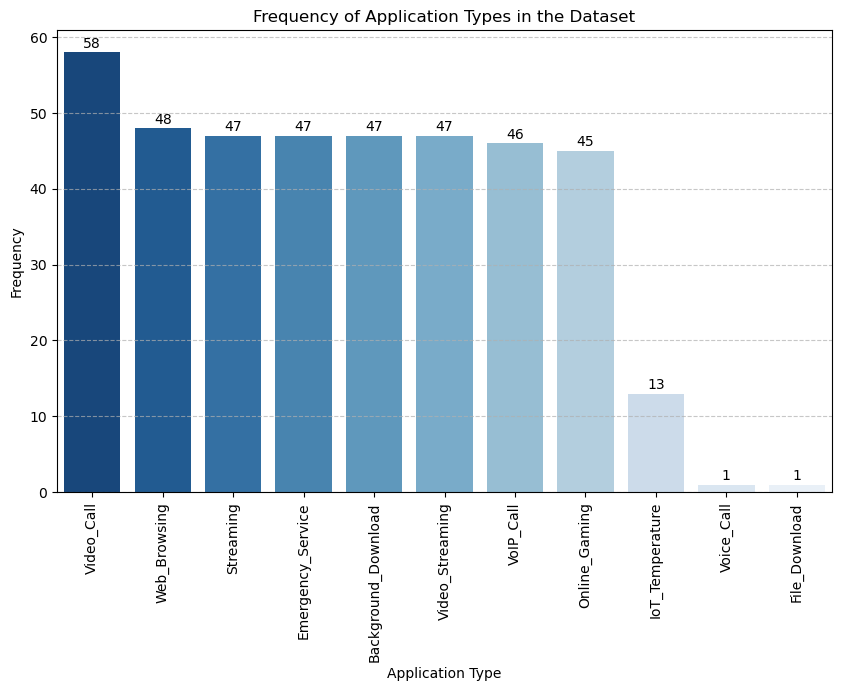

In [17]:
# Renaming the variable for clarity
application_type_counts = df['Application_Type'].value_counts()

# Creating the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=application_type_counts.index, 
            y=application_type_counts.values, 
            hue=application_type_counts.index,  # Assign x to hue for color mapping
            palette="Blues_r",  # Use reversed palette (darker to lighter)
            dodge=False)  # Adding dodge=False to ensure colors are applied to the entire bar

# Title and labels
plt.title('Frequency of Application Types in the Dataset')
plt.xlabel('Application Type')
plt.ylabel('Frequency')

# Rotating x-ticks for readability
plt.xticks(rotation=90)

# Adding annotations (counts) on top of each bar
for i, count in enumerate(application_type_counts.values):
    plt.text(i, count + 0.2, str(count), ha='center', va='bottom', fontsize=10, color='black')

# Adding grid lines to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Disabling the legend since it's not necessary
plt.legend([], [], frameon=False)

# Displaying the plot
plt.show()


### **Correlation Between Signal Strength and Allocated Bandwidth**


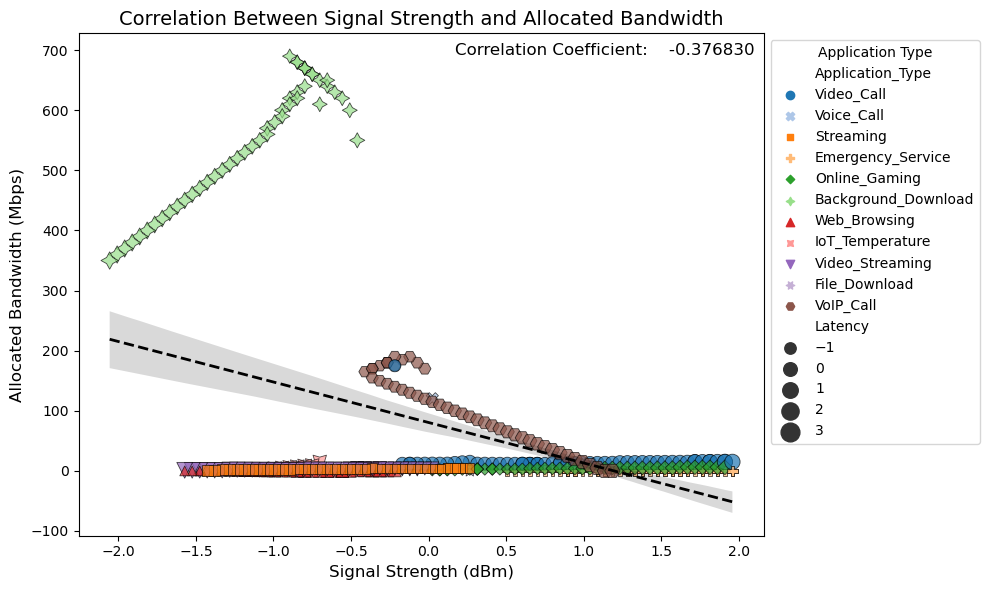

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation coefficient
correlation = df['Signal_Strength'].corr(df['Allocated_Bandwidth'])

# Create the scatter plot with enhanced features
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, 
                x='Signal_Strength', 
                y='Allocated_Bandwidth',
                hue='Application_Type',  # Color by Application_Type
                palette="tab20",  # Color palette with more variations
                style='Application_Type',  # Different marker styles for each Application_Type
                size='Latency',  # Size of points based on Latency
                sizes=(50, 200),  # Control the size range for points
                edgecolor='black',  # Add black edges to the points for better visibility
                alpha=0.7)  # Add transparency to avoid overlapping points

# Add a regression line to showcase potential correlation
sns.regplot(data=df, x='Signal_Strength', y='Allocated_Bandwidth', scatter=False, color='black', line_kws={"linewidth": 2, 'linestyle': '--'})

# Title and labels
plt.title('Correlation Between Signal Strength and Allocated Bandwidth', fontsize=14)
plt.xlabel('Signal Strength (dBm)', fontsize=12)
plt.ylabel('Allocated Bandwidth (Mbps)', fontsize=12)

# Customize grid
plt.grid(False)

# Display the correlation coefficient on the plot
plt.text(0.55, 0.98, f'Correlation Coefficient:    {correlation:2f}', transform=plt.gca().transAxes, fontsize=12, color='black', ha='left', va='top', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Adjust legend
plt.legend(title='Application Type', bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)

# Show plot
plt.tight_layout()  # Ensure the layout does not get cut off
plt.show()


### **Signal Strength vs Latency Over Time**


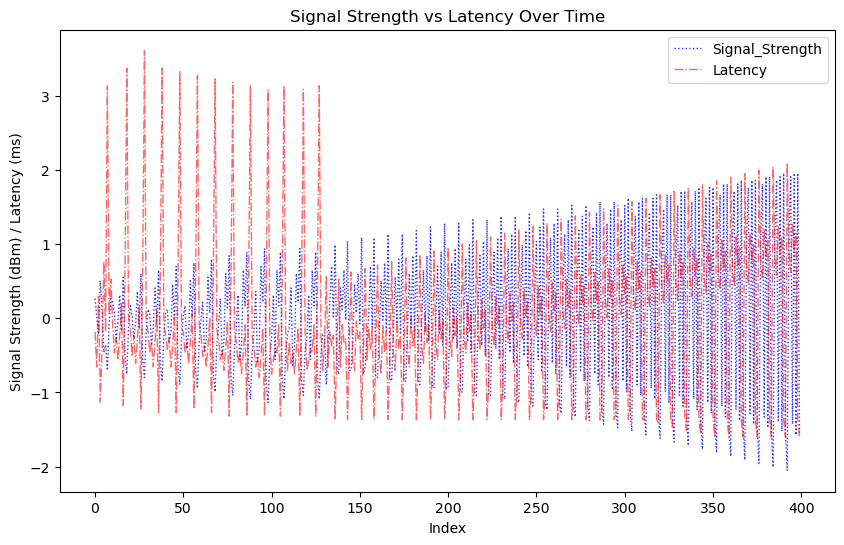

In [19]:
# Line Plot
plt.figure(figsize=(10, 6))

# Plotting Signal Strength
df.Signal_Strength.plot(kind='line', color='b', label='Signal_Strength', linewidth=1, alpha=0.8, grid=True, linestyle=':')

# Plotting Latency
df.Latency.plot(color='r', label='Latency', linewidth=1, alpha=0.6, grid=False, linestyle='-.')

# Adding the legend
plt.legend(loc='upper right')

# Naming the axes
plt.xlabel('Index')  # You can change 'Index' to 'Time' if applicable
plt.ylabel('Signal Strength (dBm) / Latency (ms)')

# Title of the plot
plt.title('Signal Strength vs Latency Over Time')

# Display the plot
plt.show()


---

### **Defining Features and Target Variable**


In [20]:
# Define features (X) and target variable (y)
X = df[['Signal_Strength', 'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth', 
        'Bandwidth_Utilization_Ratio', 'Effective_Bandwidth_Usage', 'Latency_Bandwidth_Tradeoff']]
y = df['Resource_Allocation']

---

### **Train-Test Split**

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


---

### **Handle Infinite Values**


In [22]:
# Handle potential infinite values in features
def handle_inf_values(X):
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    return X

X_train = handle_inf_values(X_train)
X_test = handle_inf_values(X_test)


---

### **Standardize Features**


In [23]:
# Standardize the features (important for SVR)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---

### **Train SVR Model**


In [24]:
# Train an SVM model
svm_model = SVR(kernel='rbf', C=20, epsilon=0.2)
svm_model.fit(X_train, y_train)

SVR(C=20, epsilon=0.2)

### **Make Predictions**


In [25]:
# Make predictions
y_pred = svm_model.predict(X_test)

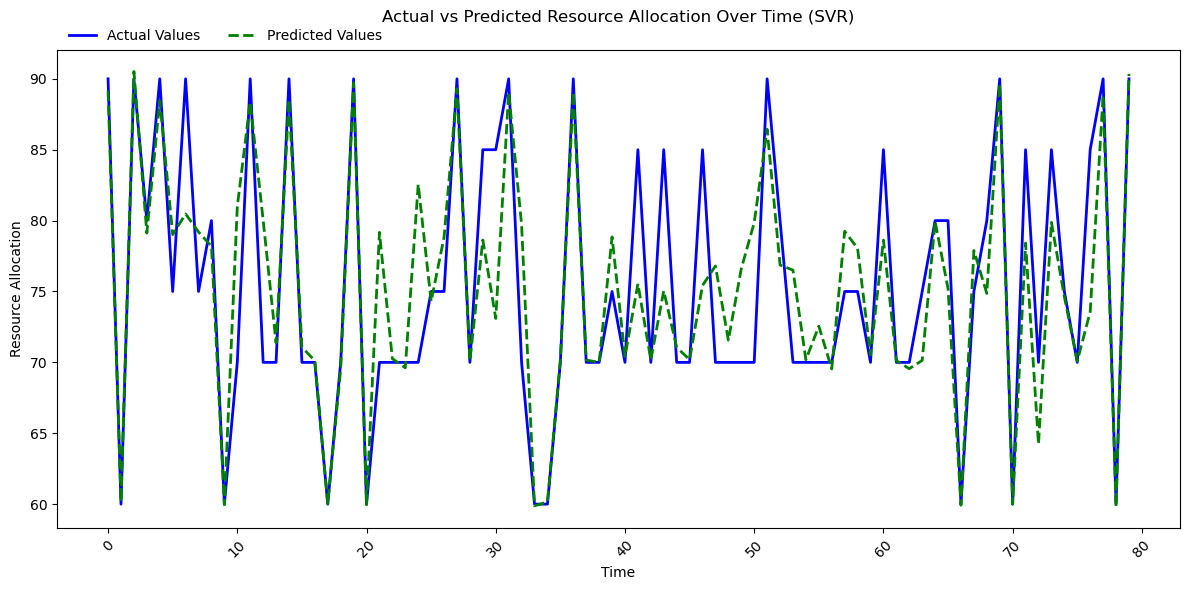

In [58]:
# Create a time index (assuming the test set has a time component or index)
time_index = range(len(y_test))  # Just use the indices of y_test for x-axis

# Plotting Actual vs Predicted values for SVR model
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(time_index, y_test, label='Actual Values', color='blue', linewidth=2)

# Plot predicted values
plt.plot(time_index, y_pred, label='Predicted Values', color='green', linestyle='--', linewidth=2)

# Move the title up by increasing the padding value
plt.title('Actual vs Predicted Resource Allocation Over Time (SVR)', pad=20)
plt.xlabel('Time')
plt.ylabel('Resource Allocation')

# Adjust legend (without box and placed outside the plot)
plt.legend(frameon=False, loc='upper center', ncol=2, bbox_to_anchor=(0.15, 1.07))

plt.grid(False)
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary for better readability
plt.tight_layout()

# Show the plot
plt.show()


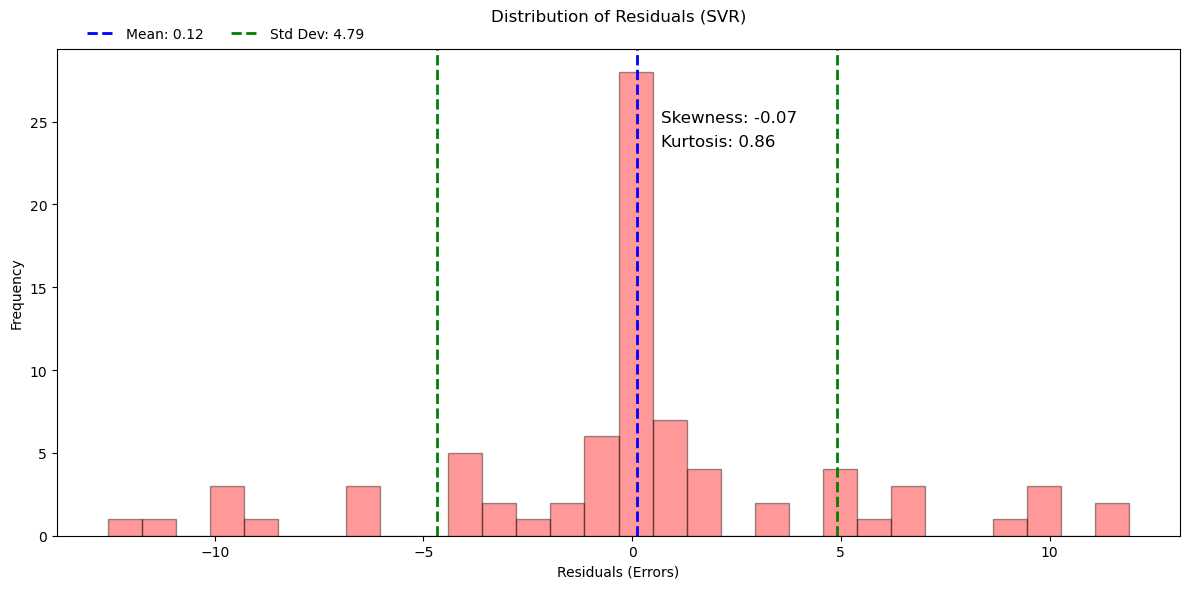

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis

# Calculate residuals (errors) between actual and predicted values
residuals = y_test - y_pred

# Calculate mean and standard deviation of residuals
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)

# Calculate skewness and kurtosis
residual_skewness = skew(residuals)
residual_kurtosis = kurtosis(residuals)

# Plotting the histogram of residuals (errors)
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, color='red', edgecolor='black', alpha=0.4)  # Reduced alpha for less intensity

# Add lines for mean and standard deviation
plt.axvline(mean_residual, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_residual:.2f}')
plt.axvline(mean_residual + std_residual, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev: {std_residual:.2f}')
plt.axvline(mean_residual - std_residual, color='green', linestyle='dashed', linewidth=2)

# Add text annotations for Skewness and Kurtosis
plt.text(0.7, plt.ylim()[1] * 0.85, f'Skewness: {residual_skewness:.2f}', color='black', fontsize=12)
plt.text(0.7, plt.ylim()[1] * 0.8, f'Kurtosis: {residual_kurtosis:.2f}', color='black', fontsize=12)

# Title and labels
plt.title('Distribution of Residuals (SVR)', pad=20)
plt.xlabel('Residuals (Errors)')
plt.ylabel('Frequency')

# Show the legend
plt.legend(frameon=False, loc='upper center', ncol=2, bbox_to_anchor=(0.15, 1.07))


# Tight layout to make the plot more readable
plt.tight_layout()

# Show the plot
plt.show()


### **Evaluate SVR Model**


In [26]:
# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)
rmse_svr = np.sqrt(mse_svr)


print(f"Root Mean Square Error: {rmse_svr}")
print(f"Mean Squared Error: {mse_svr}")
print(f"R-squared: {r2_svr}")



Root Mean Square Error: 4.795717956616405
Mean Squared Error: 22.99891071941303
R-squared: 0.7375185616258867


---

### **Hyperparameter Tuning for SVR**


In [27]:
# Hyperparameter tuning for SVR (Support Vector Regressor)
param_dist_svr = {
    'C': [0.1, 1, 10, 100, 300],
    'epsilon': [0.01, 0.1, 0.2, 0.5, 0.8],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],  # For polynomial kernel
    'gamma': ['scale', 'auto']
}
random_search_svr = RandomizedSearchCV(SVR(), param_dist_svr, n_iter=20, cv=5, scoring='r2', random_state=42)
random_search_svr.fit(X_train, y_train)
best_svr_model = random_search_svr.best_estimator_

### **Train Best SVR Model**


In [28]:
# Train the model with best parameters
best_svr_model = random_search_svr.best_estimator_
best_svr_model.fit(X_train, y_train)

SVR(C=300, epsilon=0.8)

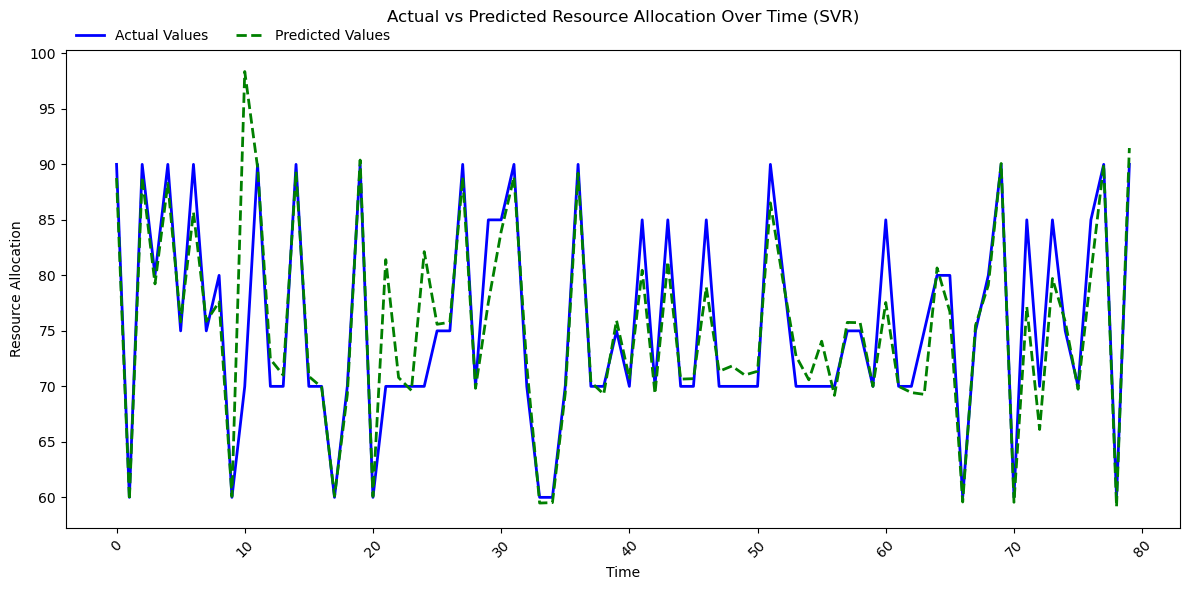

In [72]:
# Make predictions using the best-tuned model
y_pred_svr = best_svr_model.predict(X_test)

# Create a time index for plotting (or use the range of indices)
time_index = range(len(y_test))

# Plotting Actual vs Predicted values
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(time_index, y_test, label='Actual Values', color='blue', linewidth=2)

# Plot predicted values
plt.plot(time_index, y_pred_svr, label='Predicted Values', color='green', linestyle='--', linewidth=2)

# Set the title and labels
plt.title('Actual vs Predicted Resource Allocation Over Time (SVR)', pad=20)
plt.xlabel('Time')
plt.ylabel('Resource Allocation')

# Adjust legend and remove box, placed outside the plot
plt.legend(frameon=False, loc='upper center', ncol=2, bbox_to_anchor=(0.15, 1.07))

plt.grid(False)
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary for better readability
plt.tight_layout()

# Show the plot
plt.show()


### **Evaluate Tuned SVR Model**


In [29]:
# Make predictions with the tuned SVR model
y_pred_svr = best_svr_model.predict(X_test)

# Evaluate the tuned SVR model
mse_svr_t = mean_squared_error(y_test, y_pred_svr)
r2_svr_t = r2_score(y_test, y_pred_svr)
rmse_svr_t = np.sqrt(mse_svr_t)


print(f"Root Mean Square Error: {rmse_svr_t}")
print(f"Tuned SVR Mean Squared Error: {mse_svr_t}")
print(f"Tuned SVR R-squared: {r2_svr_t}")

Root Mean Square Error: 4.392238681293963
Tuned SVR Mean Squared Error: 19.29176063345493
Tuned SVR R-squared: 0.7798274387158637


---


### **Hyperparameter Tuning for Gradient Boosting**


In [30]:
# Hyperparameter tuning for GradientBoostingRegressor
gb_param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0]
}
gb_random_search = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), gb_param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
gb_random_search.fit(X_train, y_train)
best_gb_model = gb_random_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)


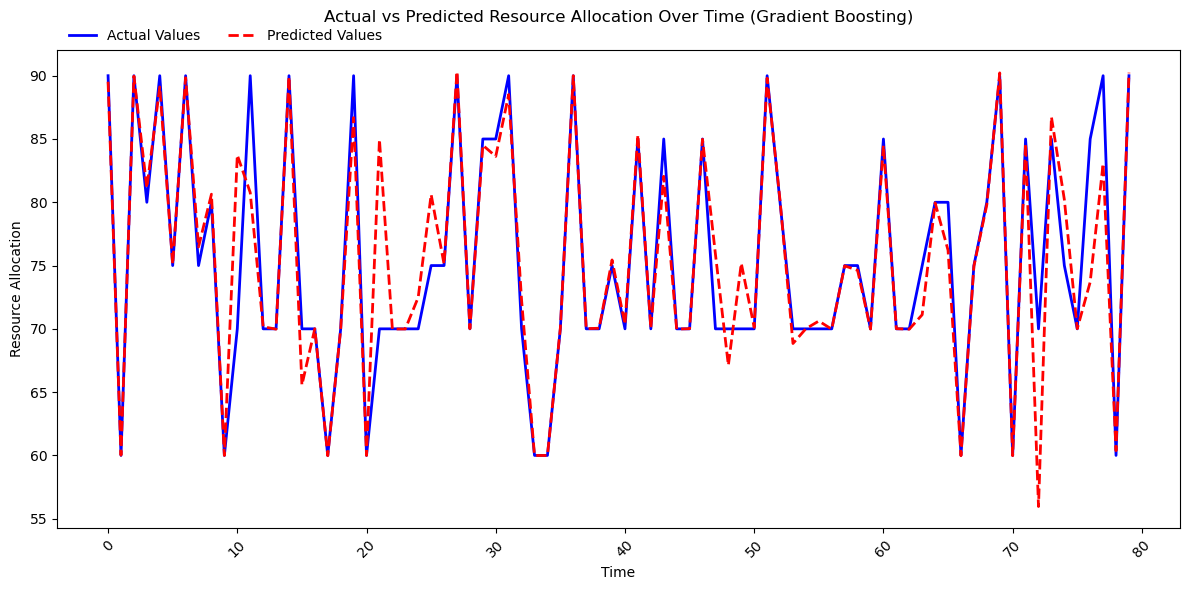

In [57]:
# Create a time index (assuming the test set has a time component or index)
time_index = range(len(y_test))  # Just use the indices of y_test for x-axis

# Plotting Actual vs Predicted values for Gradient Boosting
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(time_index, y_test, label='Actual Values', color='blue', linewidth=2)

# Plot predicted values
plt.plot(time_index, y_pred_gb, label='Predicted Values', color='red', linestyle='--', linewidth=2)

# Move the title up by increasing the padding value
plt.title('Actual vs Predicted Resource Allocation Over Time (Gradient Boosting)', pad=20)
plt.xlabel('Time')
plt.ylabel('Resource Allocation')

# Adjust legend (without box and placed outside the plot)
plt.legend(frameon=False, loc='upper center', ncol=2, bbox_to_anchor=(0.15, 1.07))

plt.grid(False)
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary for better readability
plt.tight_layout()

# Show the plot
plt.show()


### **Evaluate Gradient Boosting Model**


In [31]:
# Evaluate the Gradient Boosting model
mse_gb_t = mean_squared_error(y_test, y_pred_gb)
r2_gb_t = r2_score(y_test, y_pred_gb)
rmse_gb_t = np.sqrt(mse_gb_t)


print(f"Root Mean Square Error: {rmse_gb_t}")
print(f"Gradient Boosting Model MSE: {mse_gb_t}")
print(f"Gradient Boosting Model R-squared: {r2_gb_t}")

Root Mean Square Error: 3.6989291894063867
Gradient Boosting Model MSE: 13.682077148242588
Gradient Boosting Model R-squared: 0.8438495051513485


---

### **Hyperparameter Tuning for Random Forest**


In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Custom function to handle max_samples and bootstrap compatibility
def rf_param_dist_with_bootstrap():
    param_dist = {
        'n_estimators': [100, 300],  # Lower the range to avoid overfitting
        'max_depth': [None, 20],  # Reduce max_depth to avoid overfitting
        'min_samples_split': [2],
        'min_samples_leaf': [1],  # Lower the values of leaf size to prevent overfitting
        'bootstrap': [True],  # Set bootstrap to True to use sampling
        'max_samples': [None, 0.6],  # Consider max_samples as None or a smaller fraction
        'max_features': [1.0, 'log2']  
    }
    return param_dist

# Randomized Search CV for hyperparameter tuning
rf_random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1),
                                      rf_param_dist_with_bootstrap(), n_iter=10, cv=5, scoring='r2', random_state=42, verbose=2, error_score='raise')

# Fit the model
rf_random_search.fit(X_train, y_train)

# Best model from RandomizedSearchCV
best_rf_model = rf_random_search.best_estimator_

# Make predictions
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model MSE: {mse_rf}")
print(f"Random Forest Model R-squared: {r2_rf}")

# Output the best hyperparameters
print("Best hyperparameters found:", rf_random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=None, max_features=1.0, max_samples=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=1.0, max_samples=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=1.0, max_samples=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=1.0, max_samples=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=1.0, max_samples=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=1.0, max_samples=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END 

### **Evaluate Random Forest Model**


In [97]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluate the Random Forest model
mse_rf_t = mean_squared_error(y_test, y_pred_rf)
r2_rf_t = r2_score(y_test, y_pred_rf)
rmse_rf_t = np.sqrt(mse_rf_t)

print(f"Random Forest Model MSE: {mse_rf_t}")
print(f"Random Forest Model R-squared: {r2_rf_t}")
print(f"Random Forest Model RMSE: {rmse_rf_t}")


Random Forest Model MSE: 8.55892013888889
Random Forest Model R-squared: 0.9023189534325017
Random Forest Model RMSE: 2.9255632173803545


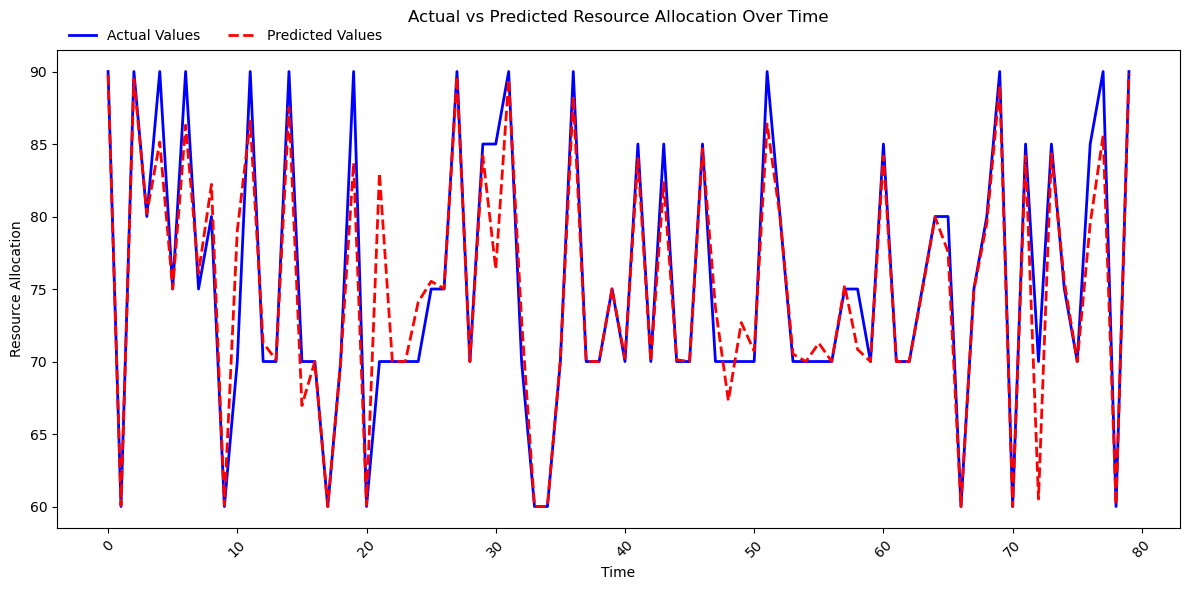

In [56]:
# If y_test is a pandas Series, use its index
time_index = y_test.index  # This will work if y_test is a pandas Series

# Alternatively, create a dummy time index if no timestamp is available
time_index = range(len(y_test))  # Just use the indices of y_test for x-axis

# Plotting Actual vs Predicted values
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(time_index, y_test, label='Actual Values', color='blue', linewidth=2)

# Plot predicted values
plt.plot(time_index, y_pred_rf, label='Predicted Values', color='red', linestyle='--', linewidth=2)

# Move the title up by increasing the padding value
plt.title('Actual vs Predicted Resource Allocation Over Time', pad=20)
plt.xlabel('Time')
plt.ylabel('Resource Allocation')

# Adjust legend (without box and placed outside the plot)
plt.legend(frameon=False, loc='upper center', ncol=2, bbox_to_anchor=(0.15, 1.07))

plt.grid(False)
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary for better readability
plt.tight_layout()

# Show the plot
plt.show()


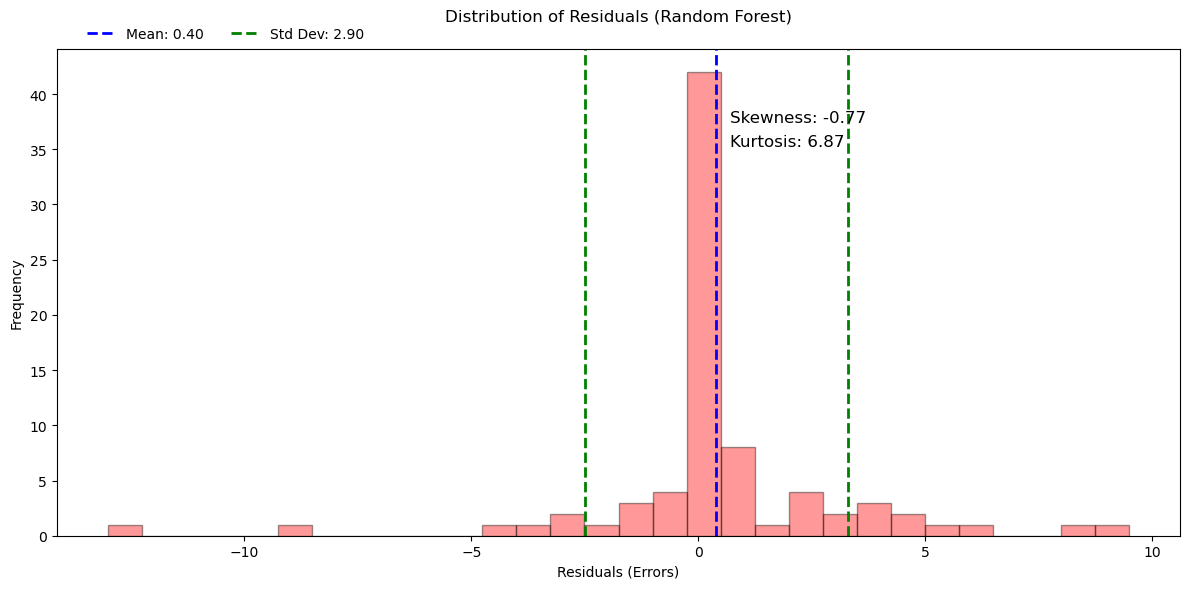

In [79]:

# Calculate residuals (errors) between actual and predicted values
residuals_rf = y_test - y_pred_rf

# Calculate mean and standard deviation of residuals
mean_residual_rf = np.mean(residuals_rf)
std_residual_rf = np.std(residuals_rf)

# Calculate skewness and kurtosis
residual_skewness_rf = skew(residuals_rf)
residual_kurtosis_rf = kurtosis(residuals_rf)

# Plotting the histogram of residuals (errors)
plt.figure(figsize=(12, 6))
plt.hist(residuals_rf, bins=30, color='red', edgecolor='black', alpha=0.4)  # Reduced alpha for less intensity

# Add lines for mean and standard deviation
plt.axvline(mean_residual_rf, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_residual_rf:.2f}')
plt.axvline(mean_residual_rf + std_residual_rf, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev: {std_residual_rf:.2f}')
plt.axvline(mean_residual_rf - std_residual_rf, color='green', linestyle='dashed', linewidth=2)

# Add text annotations for Skewness and Kurtosis
plt.text(0.7, plt.ylim()[1] * 0.85, f'Skewness: {residual_skewness_rf:.2f}', color='black', fontsize=12)
plt.text(0.7, plt.ylim()[1] * 0.8, f'Kurtosis: {residual_kurtosis_rf:.2f}', color='black', fontsize=12)

# Title and labels
plt.title('Distribution of Residuals (Random Forest)', pad=20)
plt.xlabel('Residuals (Errors)')
plt.ylabel('Frequency')

# Show the legend
plt.legend(frameon=False, loc='upper center', ncol=2, bbox_to_anchor=(0.15, 1.07))


# Tight layout to make the plot more readable
plt.tight_layout()

# Show the plot
plt.show()

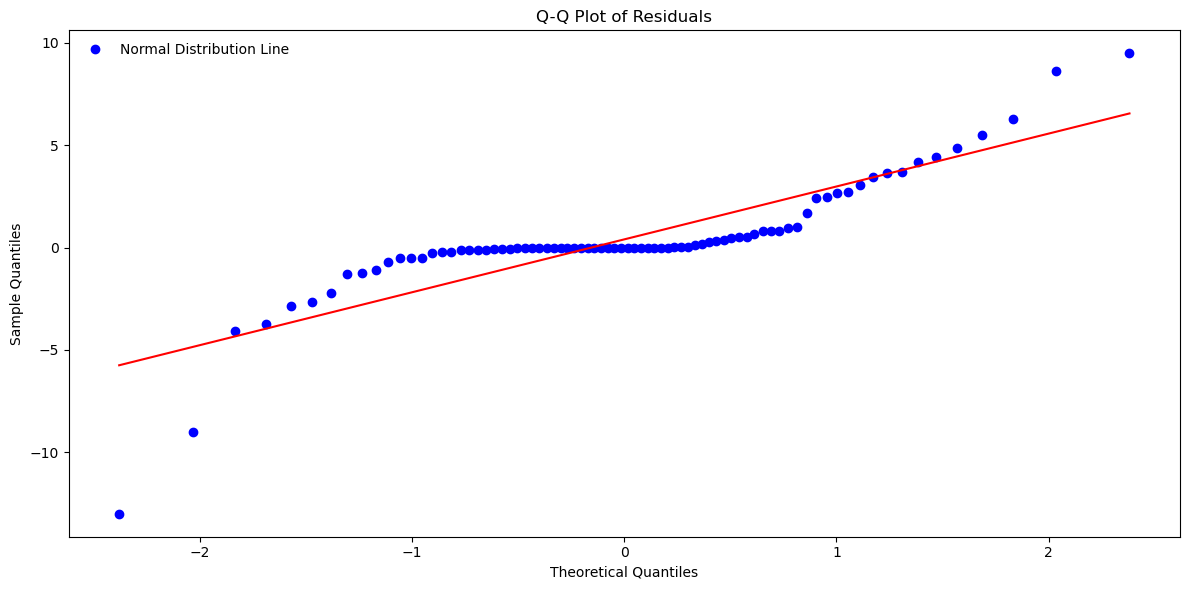

In [88]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q Plot of Residuals
plt.figure(figsize=(12, 6))
stats.probplot(residuals_rf, dist="norm", plot=plt)

# Adding title and labels
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Add a legend manually, since Q-Q plot itself doesn't automatically have labels
plt.legend(['Normal Distribution Line'], loc='upper left', frameon=False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


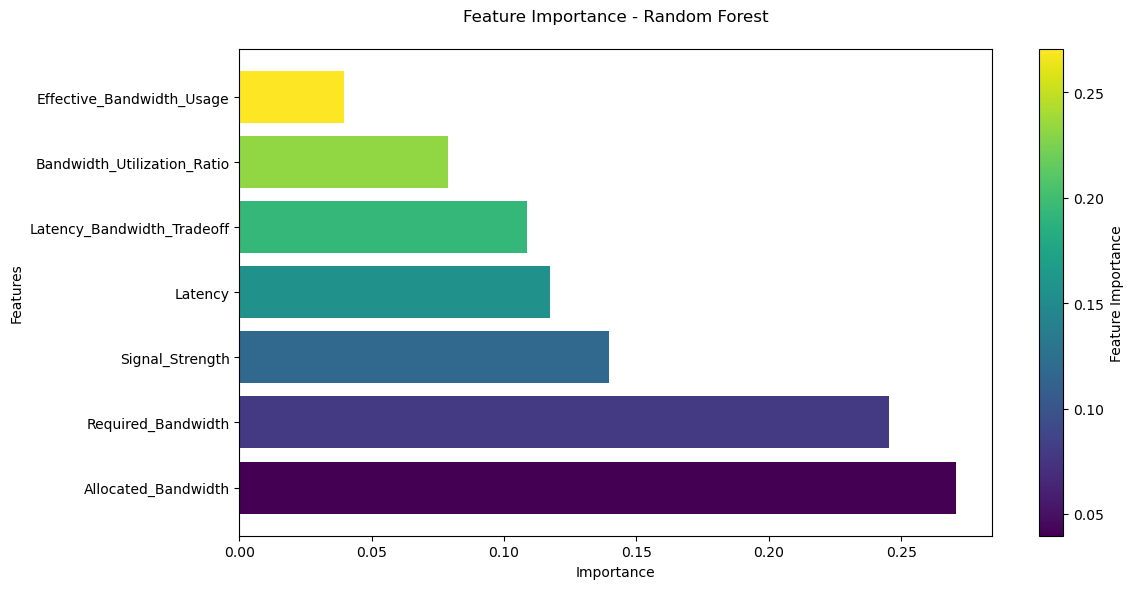

In [96]:
# Feature names
feature_names = ['Signal_Strength', 'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth', 
                 'Bandwidth_Utilization_Ratio', 'Effective_Bandwidth_Usage', 'Latency_Bandwidth_Tradeoff']

# Create a DataFrame with the feature names (if X_train is a numpy array)
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Access the feature names
features = X_train_df.columns

# Assuming best_rf_model is already fitted
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a color map that transitions from light to dark (viridis is a good choice)
colors = plt.cm.viridis(np.linspace(0, 1, len(importances)))

# Plotting feature importance with color gradient
fig, ax = plt.subplots(figsize=(12, 6))  # Create a figure and axis
bars = ax.barh(features[indices], importances[indices], color=colors)

# Add a title and labels
ax.set_title('Feature Importance - Random Forest', pad=20)
ax.set_xlabel('Importance')
ax.set_ylabel('Features')

# Adding a color bar to indicate the importance gradient
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(importances), vmax=max(importances)))
sm.set_array([])  # Empty array for colorbar
cbar = fig.colorbar(sm, ax=ax, label='Feature Importance')

# Adjusting the layout
plt.tight_layout()

# Show the plot
plt.show()


---

### **Model Evaluation Comparison Table**


In [35]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Assuming that y_test, y_pred, y_pred_svr, y_pred_svr_tuned, y_pred_gb_tuned, and y_pred_rf_tuned are defined

# Evaluate SVR
mse_svr = mean_squared_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)
rmse_svr = np.sqrt(mse_svr)

# Evaluate Tuned SVR
mse_svr_t = mean_squared_error(y_test, y_pred_svr)
r2_svr_t = r2_score(y_test, y_pred_svr)
rmse_svr_t = np.sqrt(mse_svr_t)

# Evaluate Tuned Gradient Boosting
mse_gb_t = mean_squared_error(y_test, y_pred_gb)
r2_gb_t = r2_score(y_test, y_pred_gb)
rmse_gb_t = np.sqrt(mse_gb_t)

# Evaluate Tuned Random Forest
mse_rf_t = mean_squared_error(y_test, y_pred_rf)
r2_rf_t = r2_score(y_test, y_pred_rf)
rmse_rf_t = np.sqrt(mse_rf_t)

# Creating the results table
results = pd.DataFrame({
    'Model': ['SVR', 'Tuned SVR', 'Tuned Gradient Boosting', 'Tuned Random Forest'],
     'RMSE': [rmse_svr, rmse_svr_t, rmse_gb_t, rmse_rf_t],
    'MSE': [mse_svr, mse_svr_t, mse_gb_t, mse_rf_t],
    'R-squared': [r2_svr, r2_svr_t, r2_gb_t, r2_rf_t]
   
})

# Apply styling for better readability
styled_results = results.style.format({
    'MSE': '{:.4f}',
    'R-squared': '{:.4f}',
    'RMSE': '{:.4f}'
}).hide(axis='index')  # Hide the index for cleaner view

# Display the styled table (this will work well in Jupyter Notebook)
styled_results


Model,RMSE,MSE,R-squared
SVR,4.7957,22.9989,0.7375
Tuned SVR,4.3922,19.2918,0.7798
Tuned Gradient Boosting,3.6989,13.6821,0.8438
Tuned Random Forest,2.9256,8.5589,0.9023


---

### **Model Evaluation Comparison Visual**


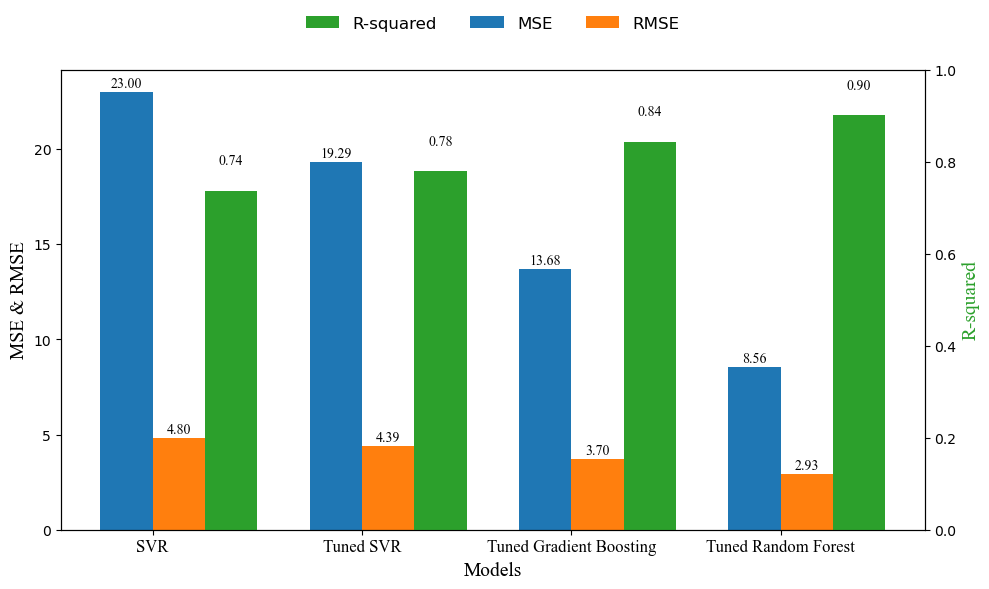

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a DataFrame for the evaluation metrics
metrics = pd.DataFrame({
    'Model': ['SVR', 'Tuned SVR', 'Tuned Gradient Boosting', 'Tuned Random Forest'],
    'R-squared': [r2_svr, r2_svr_t, r2_gb_t, r2_rf_t],
    'MSE': [mse_svr, mse_svr_t, mse_gb_t, mse_rf_t],
    'RMSE': [rmse_svr, rmse_svr_t, rmse_gb_t, rmse_rf_t]
})

# Set up the figure and the primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set positions for each bar group (models)
bar_width = 0.25
x = np.arange(len(metrics))

# Create grouped bars for MSE and RMSE on the primary axis
bars_mse = ax1.bar(x - bar_width / 2, metrics['MSE'], bar_width, label='MSE', color='#1f77b4')  # Modern blue
bars_rmse = ax1.bar(x + bar_width / 2, metrics['RMSE'], bar_width, label='RMSE', color='#ff7f0e')  # Modern orange

# Display the values on top of the bars
for bar in bars_mse:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=10, family='Times New Roman')

for bar in bars_rmse:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=10, family='Times New Roman')

# Create a secondary axis for R-squared
ax2 = ax1.twinx()

# Create R-squared bars on the secondary axis
bars_r2 = ax2.bar(x + 3 * bar_width / 2, metrics['R-squared'], bar_width, label='R-squared', color='#2ca02c')  # Modern green

# Display the values on top of the R-squared bars
for bar in bars_r2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=10, family='Times New Roman')

# Labels and titles
ax1.set_xlabel('Models', fontsize=14, family='Times New Roman')
ax1.set_ylabel('MSE & RMSE', fontsize=14, family='Times New Roman')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics['Model'], fontsize=12, family='Times New Roman')  # No rotation
ax1.yaxis.label.set_fontname('Times New Roman')
ax1.xaxis.label.set_fontname('Times New Roman')

# Set limits and label for the secondary y-axis
ax2.set_ylabel('R-squared', fontsize=14, family='Times New Roman')
ax2.set_ylim(0, 1)  # R-squared values typically range from 0 to 1
ax2.yaxis.label.set_color('#2ca02c')  # Matching color with R-squared bars

# Combine legends for both axes
bars = [bars_r2, bars_mse, bars_rmse]
labels = [bar.get_label() for bar in bars]
ax1.legend(bars, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### **Interpretation and Communication**

### **Translate Findings into Actionable Insights**

#### Actionable Insights:

1. **Resource Allocation by Application Type**: 
    - The ANOVA test showed a significant impact of `Application_Type` on `Resource_Allocation`. This suggests that network resources are not uniformly required across different types of applications. Therefore, a dynamic resource allocation strategy should be implemented to optimize network performance for each application type.

2. **Signal Strength and Latency**: 
    - The boxplots revealed variations in `Signal_Strength` and `Latency` across different `Application_Types`. Applications like `Emergency_Service` may require stronger signals and lower latency. Network configurations should be adjusted accordingly.

3. **Bandwidth Utilization Ratio**: 
    - The newly created feature `Bandwidth_Utilization_Ratio` can be used as a metric to measure how efficiently the network resources are being utilized. A lower ratio may indicate underutilization, and a higher ratio may indicate overutilization. Network operators can use this metric for real-time monitoring and adjustments.

---


### 🔍 [Findings](#findings)
- **Application types** significantly influence Resource_Allocation, with variations observed in Latency and Signal_Strength.
- Models effectively predicted Resource_Allocation, validating the importance of features like Bandwidth_Utilization_Ratio and Effective_Bandwidth_Usage.

---

### 📈 [Actionable Insights](#actionable-insights)
- Develop QoS-optimized resource allocation policies based on application type.
- Prioritize real-time metrics like **Bandwidth_Utilization_Ratio** and **Latency** for monitoring and dynamic network adjustments.
- Leverage predictive models for future resource allocation to enhance user experience.

---

### 🏁 [Conclusion](#conclusion)
This work demonstrates the potential of machine learning for analyzing and optimizing resource allocation in 5G networks. Future efforts should focus on real-world testing of proposed strategies and integrating predictive models into live 5G systems.
